## Problem: Maximum Number of Events That Can Be Attended
LeetCode: 1353. Maximum Number of Events That Can Be Attended

https://leetcode.com/problems/maximum-number-of-events-that-can-be-attended/description/

You are given an array of events where events[i] = [startDayi, endDayi]. Every event i starts at startDayi and ends at endDayi.

You can attend an event i at any day d where startTimei <= d <= endTimei. You can only attend one event at any time d.

Return the maximum number of events you can attend.

 

Example 1:

   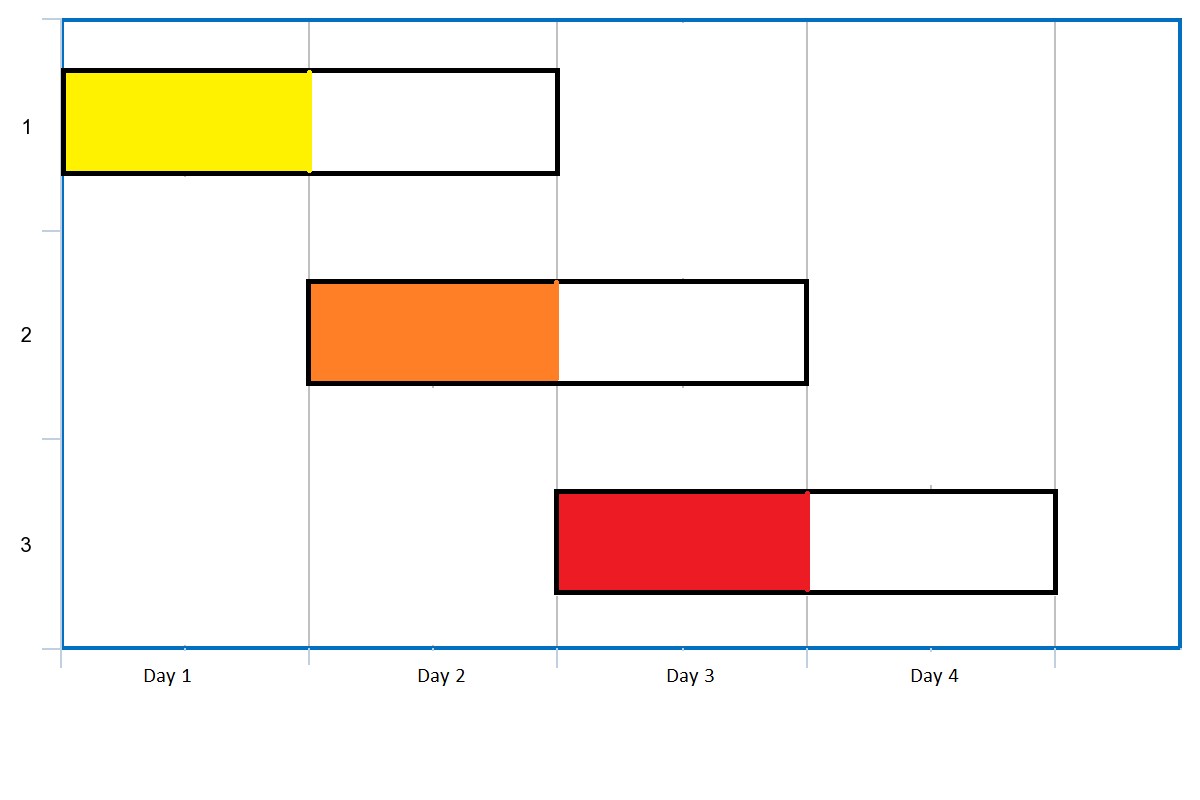
    
    Input: events = [[1,2],[2,3],[3,4]]
    Output: 3
    Explanation: You can attend all the three events.
    One way to attend them all is as shown.
    Attend the first event on day 1.
    Attend the second event on day 2.
    Attend the third event on day 3.
Example 2:

    Input: events= [[1,2],[2,3],[3,4],[1,2]]
    Output: 4
 

Constraints:

    1 <= events.length <= 105
    events[i].length == 2
    1 <= startDayi <= endDayi <= 105


### Approach: 
Problem Understanding: One event can go from day 1 to N days. However, same event can be attaended in any days between 1 to N days.
In a one day, only one event can be attended.
Start and end days of events may be same for multiple events.

First sort the events based on start days. If there are many events start at the same day, then we have to prioritize the event which will finish earlier, that means attend the event based on end day.
Suppose two events a =[1,2], b =[1, 3] event a will start at day1 and will end at day2, while event b will start at day1 but will end at day3. So, eventa will be attended 1st and then event b. Here, end day is the deciding factor as well for prioritizing the events.

We can use min heap to store the events last day, on the day, where many events start. then choose the event from top of the min heap.

Also, if events are expired, then pop out the event from min heap. That means, check if minheap has days less than today, that means events are expired so remove from the heap.

As, only one event can be attended in a day, so pop one event from heap on each day.

Steps:
1. Sort the events based on start day.
2. find total days, when all events run. Basically, the max end days from all events.
3. Run teh loop from day1 to total days. Say Iterator variable is day.
4. Iterate all events, whose start day is same as day, and store all those events end day in min heap.
5. Remove expired events end days from heap.
6. Take out one events whose end day is minimum. That means pop out event from min heap. We can pop only one event as only one event can be attended in a day.
7. Increae the attended event count when taking out one event out from min heap.



In [3]:
import heapq
def maxEvents(events):
    events.sort()
    totalDays = max(event[1] for event in events)
    count = 0
    eventId = 0
    minHeap = []
    for day in range(1, totalDays+1):
        while eventId < len(events) and events[eventId][0] == day:
            heapq.heappush(minHeap, events[eventId][1])
            eventId += 1
        while minHeap and minHeap[0] < day:
            heapq.heappop(minHeap)
        if minHeap:
            heapq.heappop(minHeap)
            count += 1
    return count

In [4]:
events= [[1,2],[2,3],[3,4],[1,2]]
maxEvents(events)

4

In [5]:
events = [[1,2],[2,3],[3,4]]
maxEvents(events)

3